In [27]:
import torch
from torch import nn
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np

In [28]:
# 입력 데이터
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)

# AND, OR, XOR 게이트 출력 데이터
y_and = torch.tensor([[0],[0],[0],[1]], dtype=torch.float)
y_or = torch.tensor([[0],[1],[1],[1]], dtype=torch.float)
y_xor = torch.tensor([[0],[1],[1],[0]], dtype=torch.float)

In [29]:
# MLP 모델
class LogicGate_Model(nn.Module):
    def __init__(self):
        super(LogicGate_Model, self).__init__()
        self.model = nn.Sequential (
            nn.Linear(2, 4),
            nn.Sigmoid(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [30]:
# training 함수
def train(X, y, epochs=1000, lr=0.02, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True, gate_type=""):
    if not model:
        return None

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        optimizer.zero_grad()
        hypothesis = model(X)
        error = loss_fn(hypothesis, y)
        error.backward()
        optimizer.step()

        if epoch % every_print == 0:
            print(f'{gate_type}: {epoch}, loss: {error.item()}')

    return model


In [31]:
# 모델 학습
and_model = LogicGate_Model()
and_model = train(X, y_and, epochs=3000, optimizer='Adam', model=and_model, gate_type="AND")
print('\n')

or_model = LogicGate_Model()
or_model = train(X, y_or, epochs=3000, optimizer='Adam', model=or_model, gate_type="OR")
print('\n')

xor_model = LogicGate_Model()
xor_model = train(X, y_xor, epochs=3000, optimizer='Adam', model=xor_model, reset='xavier', gate_type="XOR")
print('\n')

AND: 100, loss: 0.19728295505046844
AND: 200, loss: 0.03723197430372238
AND: 300, loss: 0.014368780888617039
AND: 400, loss: 0.00791771151125431
AND: 500, loss: 0.005123629700392485
AND: 600, loss: 0.003628537757322192
AND: 700, loss: 0.002722759498283267
AND: 800, loss: 0.0021270865108817816
AND: 900, loss: 0.0017118178075179458
AND: 1000, loss: 0.0014093546196818352
AND: 1100, loss: 0.0011813894379884005
AND: 1200, loss: 0.001004849560558796
AND: 1300, loss: 0.0008650746312923729
AND: 1400, loss: 0.0007523189997300506
AND: 1500, loss: 0.0006598966429010034
AND: 1600, loss: 0.0005831230664625764
AND: 1700, loss: 0.0005185974296182394
AND: 1800, loss: 0.00046383621520362794
AND: 1900, loss: 0.0004168927844148129
AND: 2000, loss: 0.00037637524656020105
AND: 2100, loss: 0.0003411145880818367
AND: 2200, loss: 0.0003102509072050452
AND: 2300, loss: 0.00028309726621955633
AND: 2400, loss: 0.00025904577341862023
AND: 2500, loss: 0.0002376609918428585
AND: 2600, loss: 0.00021856823877897114
A

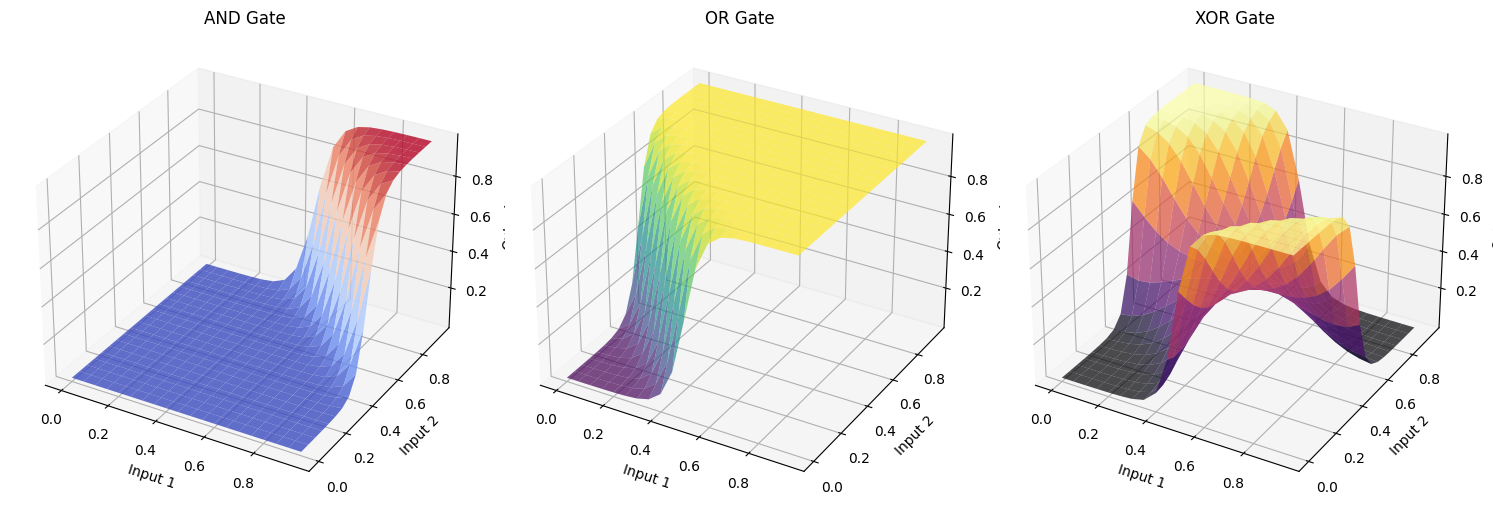

In [32]:
fig = plt.figure(figsize=(15, 5))

# AND 게이트 출력 그래프
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('AND Gate')
ax1.set_xlabel('Input 1')
ax1.set_ylabel('Input 2')
ax1.set_zlabel('Output')
x1 = np.arange(0, 1, 0.05)
x2 = np.arange(0, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
with torch.no_grad():
    y_and = and_model(torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float)).reshape(x1.shape)
ax1.plot_surface(x1, x2, y_and, cmap='coolwarm', alpha=0.8)


# OR 게이트 출력 그래프
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('OR Gate')
ax2.set_xlabel('Input 1')
ax2.set_ylabel('Input 2')
ax2.set_zlabel('Output')
with torch.no_grad():
    y_or = or_model(torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float)).reshape(x1.shape)
ax2.plot_surface(x1, x2, y_or, cmap='viridis', alpha=0.7)

# XOR 게이트 출력 그래프
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('XOR Gate')
ax3.set_xlabel('Input 1')
ax3.set_ylabel('Input 2')
ax3.set_zlabel('Output')
with torch.no_grad():
    y_xor = xor_model(torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float)).reshape(x1.shape)
ax3.plot_surface(x1, x2, y_xor, cmap='inferno', alpha=0.7)

plt.tight_layout()
plt.show()

In [35]:
result_and = and_model(X)
result_or = or_model(X)
result_xor = xor_model(X)

# 0.5 보다 크면 1, 작으면 0
print(result_and, torch.where(result_and > 0.5, torch.tensor(1), torch.tensor(0)))
print(result_or, torch.where(result_or > 0.5, torch.tensor(1), torch.tensor(0)))
print(result_xor, torch.where(result_xor > 0.5, torch.tensor(1), torch.tensor(0)))

tensor([[2.6228e-06],
        [1.0911e-04],
        [1.0881e-04],
        [9.9958e-01]], grad_fn=<SigmoidBackward0>) tensor([[0],
        [0],
        [0],
        [1]])
tensor([[5.0350e-04],
        [9.9986e-01],
        [9.9986e-01],
        [9.9996e-01]], grad_fn=<SigmoidBackward0>) tensor([[0],
        [1],
        [1],
        [1]])
tensor([[0.0011],
        [0.9990],
        [0.9990],
        [0.0011]], grad_fn=<SigmoidBackward0>) tensor([[0],
        [1],
        [1],
        [0]])
